**Fuente**
Eurostat

**Información**
Employees by sex, age and occupation (1 000)

**Enlace**
https://ec.europa.eu/eurostat/databrowser/view/lfsq_eegais/default/table?lang=en

**Units**
Thousands

In [23]:
import pandas as pd
import numpy as np

In [24]:
path = '../data/raw_data/europe_worker_force.xlsx'
files = ['total', 'managers', 'professionals', 'technicians', 'clerical_support']

In [25]:
labeledData = {k:pd.read_excel(path, f'Sheet {v}', dtype=str) for (k,v) in zip(files, range(1,6))} 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
for key, value in labeledData.items():

    labeledData[key] = value.loc[11:49]   # keep the rows with information

    labeledData[key].replace({':': np.nan, 'd': np.nan, 'b': np.nan}, inplace=True)   # replace invalid characters with NaN

    labeledData[key] = labeledData[key].loc[:, labeledData[key].isnull().mean() < .5]   # Remove columns with over 50% NaN

    # This will create a dictionary to rename all the columns
    columns_dict_keys = labeledData[key].columns.tolist()

    columns_dict_values = ['Country','2019_total', '2019_males', '2019_females', '2020_Q1_total', '2020_Q1_males', 
                           '2020_Q1_females', '2020_Q2_total', '2020_Q2_males', '2020_Q2_females', '2020_Q3_total', 
                           '2020_Q3_males', '2020_Q3_females', '2020_Q4_total', '2020_Q4_males', '2020_Q4_females', 
                           '2021_Q1_total', '2021_Q1_males', '2021_Q1_females', '2021_Q2_total', '2021_Q2_males', 
                           '2021_Q2_females', '2021_Q3_total', '2021_Q3_males', '2021_Q3_females', '2021_Q4_total', 
                           '2021_Q4_males', '2021_Q4_females', '2022_total', '2022_males', '2022_females']

    columns_rename_dict = dict(zip(columns_dict_keys, columns_dict_values))
    
    labeledData[key].rename(columns=columns_rename_dict, inplace=True)

    labeledData[key]['Work_type'] = key

    if key == 'managers' or key == 'clerical_support':
        labeledData[key].drop(range(39, 40), inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [27]:
fullData = pd.concat(list(labeledData.values()))

In [28]:
# This will convert all the columns to numeric except 'Country'
cols = fullData.columns.drop(['Country', 'Work_type'])
fullData[cols] = fullData[cols].apply(pd.to_numeric, errors='coerce')

In [29]:
# This will merge all the quarter values into a new column with the equivalent mean for the year
quarterToTotal = {'2020_total' : ['2020_Q1_total', '2020_Q2_total', '2020_Q3_total', '2020_Q4_total'],
                  '2020_males' :  ['2020_Q1_males', '2020_Q2_males', '2020_Q3_males', '2020_Q4_males'],
                  '2020_females' : ['2020_Q1_females', '2020_Q2_females', '2020_Q3_females', '2020_Q4_females'],
                  '2021_total' : ['2021_Q1_total', '2021_Q2_total', '2021_Q3_total', '2021_Q4_total'],
                  '2021_males' : ['2021_Q1_males', '2021_Q2_males', '2021_Q3_males', '2021_Q4_males'],
                  '2021_females' : ['2021_Q1_females', '2021_Q2_females', '2021_Q3_females', '2021_Q4_females']}

for key, value in quarterToTotal.items():
    lista_columnas = quarterToTotal[key]
    fullData[key] = fullData[lista_columnas].mean(axis=1)

In [30]:
colsToMelt = ['2019_males', '2019_total', '2019_females', '2020_males', '2020_total', '2020_females',
              '2021_males', '2021_total', '2021_females', '2022_males', '2022_total', '2022_females']

fullData = pd.melt(fullData, id_vars=['Country', 'Work_type'], value_vars=colsToMelt,
    var_name=['Year'], value_name='Value')

In [31]:
fullData[['Year', 'Gender']] = fullData.Year.str.split("_", expand = True)

In [32]:
# fullData['Year']= pd.to_datetime(fullData['Year'])
fullData['Year'] = fullData['Year'].astype('datetime64[ns]')
fullData['Year'] = fullData['Year'].apply(lambda x: x.year)

In [33]:
fullData['Country'].unique()

array(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)',
       'European Union - 15 countries (1995-2004)',
       'Euro area - 19 countries  (from 2015)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Serbia', 'Turkey'], dtype=object)

In [34]:
fullData = fullData[ (fullData['Country'] != 'European Union - 28 countries (2013-2020)') & (fullData['Country'] != 'European Union - 15 countries (1995-2004)') & (fullData['Country'] != 'Euro area - 19 countries  (from 2015)')]

In [35]:
fullData['Country'].unique()

array(['European Union - 27 countries (from 2020)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Serbia', 'Turkey'], dtype=object)

In [36]:
fullData["Country"] = np.where(fullData["Country"] == 'European Union - 27 countries (from 2020)', 'European Union', fullData["Country"])

In [37]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    2136 non-null   object 
 1   Work_type  2136 non-null   object 
 2   Year       2136 non-null   int64  
 3   Value      2000 non-null   float64
 4   Gender     2136 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 100.1+ KB


In [38]:
fullData.describe()

,Year,Value
count,2136.000000,2000.000000
mean,2020.500000,2178.244179
std,1.118296,9823.779486
min,2019.000000,1.266667
25%,2019.750000,79.975000
50%,2020.500000,287.900000
75%,2021.250000,1110.893750
max,2022.000000,168392.000000


In [39]:
fullData.to_csv('../data/clean_data/europe_working_force.csv')

In [40]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [41]:
# Import necessary fonts
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("PP Neue Montreal")

'/Users/laurabarreda/Library/Fonts/PPNeueMontreal-Book.otf'

In [42]:
# Define styling
def visStyling():
    '''
    This function defines the styling rules of the data visualization
    '''
    enmax_palette = ["#c5c5c5", "#f54939", "#2018c2", '#a1a1a1', '#838383']
    color_codes_wanted = ['grey1', 'red', 'blue', 'grey2', 'grey3']
    c = lambda x: enmax_palette[color_codes_wanted.index(x)]
    color_pair = [c('red'), c('grey2')]
    mpl.rcParams['font.sans-serif'] = 'PP Neue Montreal'
    # plt.rc('legend',fontsize=20)
    plt.rc('legend',edgecolor='white')
    plt.rc('legend',facecolor=c('grey1'))
    plt.rc('font', size=20) 

    return enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams

enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams = visStyling()

In [43]:
# Define the function to pring an individual pie plot
def pie_plot_general(data1, data2, labels_pie, title, colors):
    '''
    Funcion que crea un pieplot único
    '''
    fig, ax = plt.subplots(facecolor=c("grey1"), figsize=(10, 7))
    pie_plot = plt.pie([data1, data2], labels = None, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"}, 
                       textprops={'color':"w", 'fontsize':'15', 'fontweight' : 'semibold'})
    plt.legend(labels=labels_pie,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white')
    plt.title(title, pad=30, fontsize = 20)
    return pie_plot

In [44]:
def getPiePlotData(gender):
    return fullData.loc[(fullData['Country'] == 'European Union') & 
                        (fullData['Year'] == 2020) &
                        (fullData['Work_type'] == 'total') &
                        (fullData['Gender'] == gender), 'Value'].values[0]

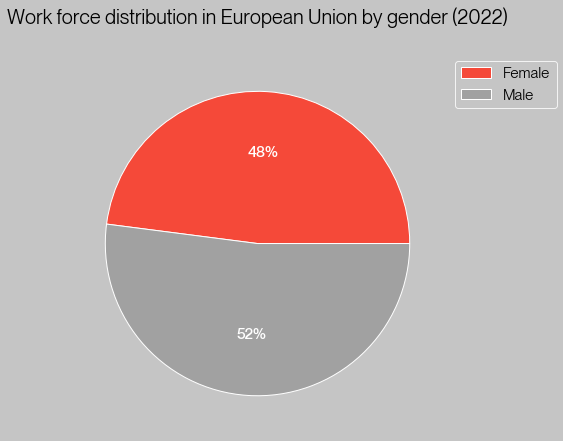

In [46]:
# Define the individual settings for the plot
labels = ['Female', 'Male']
title = 'Work force distribution in European Union by gender (2022)'
pie_plot_general(getPiePlotData('females'), getPiePlotData('males'), labels, title, color_pair);

In [47]:
def getBarPlotData(gender):
    return fullData.loc[(fullData['Country'] == 'European Union') & 
                        (fullData['Work_type'] == 'total') &
                        (fullData['Gender'] == gender), 'Value'].values

In [48]:
def barPlotDoubleColumn(time, firstCol, secondCol, c, labelList):
    x_axis = np.arange(len(time))
    fig, ax = plt.subplots(facecolor=c("grey1"), figsize=(10, 7))
    ax.set_facecolor(c("grey1"))
    plt.bar(x_axis -0.2, firstCol, width=0.4, label = labelList[0], color=c('red'), edgecolor='white');
    plt.bar(x_axis +0.2, secondCol, width=0.4, label = labelList[1], color=c('grey2'), edgecolor='white');

    plt.grid(visible=False)
    plt.xticks(x_axis, time);
    plt.title('Work force distribution in Europe by gender from 2019 until 2022', pad=40, fontsize = 20);
    plt.legend(labels=labelList,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')

    plt.setp(ax.get_xticklabels(), fontsize=15)
    plt.setp(ax.get_yticklabels(), fontsize=15)

    plt.show()

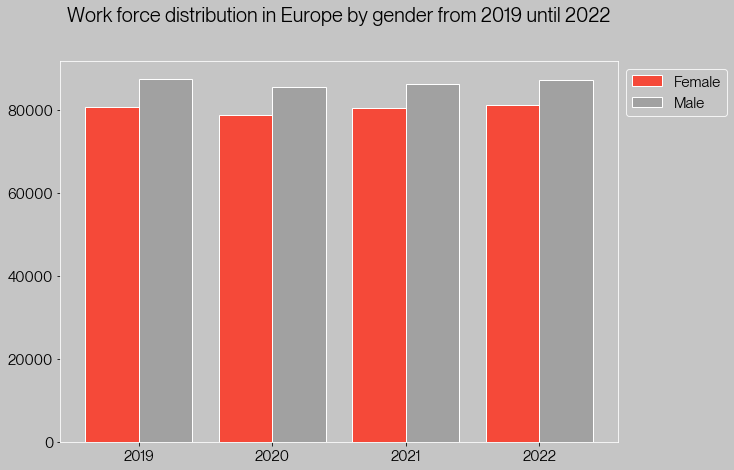

In [49]:
barPlotDoubleColumn(fullData['Year'].unique(), getBarPlotData('females'), getBarPlotData('males'), c, ['Female', 'Male'])

In [50]:
# Define the function to create a pie plot in a grid of 4
def pie_plot_inside_grid4(data1, data2,ax1, ax2):
    '''
    Función que crea un pie plot preparado para estar dentro de un grid de 4x4
    '''
    data = [data1, data2]
    colors = [c('red'), c('grey2')]
    pie_plot_total = axs[ax1, ax2].pie(data, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"}, textprops={'color':"w", 'fontsize':'15', 'fontweight' : 'semibold'})

    return pie_plot_total

In [51]:
def getPiePlot4Data(gender, work_type):
    return fullData.loc[(fullData['Country'] == 'European Union') & 
                        (fullData['Year'] == 2022) &
                        (fullData['Work_type'] == work_type) &
                        (fullData['Gender'] == gender), 'Value'].values[0]

NameError: name 'ax' is not defined

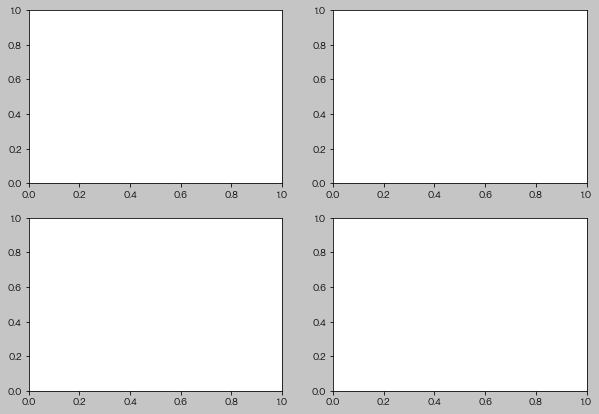

In [52]:
# Define the individual settings of the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7), facecolor=c("grey1"))
labels = ['Female', 'Male']
ax.set_facecolor(c("grey1"))
pie_plot_inside_grid4(getPiePlot4Data('females','managers'), getPiePlot4Data('males','managers'), 0, 0);
pie_plot_inside_grid4(getPiePlot4Data('females','professionals'), getPiePlot4Data('males','professionals'), 0, 1);
pie_plot_inside_grid4(getPiePlot4Data('females','technicians'), getPiePlot4Data('males','technicians'), 1, 0);
pie_plot_inside_grid4(getPiePlot4Data('females','clerical_support'), getPiePlot4Data('males','clerical_support'), 1, 1);
axs[0, 0].set_title("Managers", size=15)
axs[0, 1].set_title("Professionals", size=15)
axs[1, 0].set_title("Technicians", size=15)
axs[1, 1].set_title("Support", size=15)
plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.suptitle('Work force distribution in Europe by gender and profession type (2022)', fontsize=20, y=1);

In [ ]:
def getLinePlotdata(work_type):
    return fullData.loc[(fullData['Country'] == 'European Union') & 
           (fullData['Work_type'] == work_type) &
           ((fullData['Gender'] == 'females') | (fullData['Gender'] == 'males'))]

In [ ]:
def line_plot_comparison_years(dataframe, valor_x, valor_y, valor_hue, ax_number, title):
    colors = [c('red'), c('grey2')]
    sns.set(rc={'axes.facecolor':c('grey1')})
    sns.set_palette(sns.color_palette(colors))
    line_plot_comparison = sns.lineplot(data=dataframe, x=valor_x, y=valor_y, hue=valor_hue, ax=ax_number, linewidth=3).set(title=title)
    return line_plot_comparison

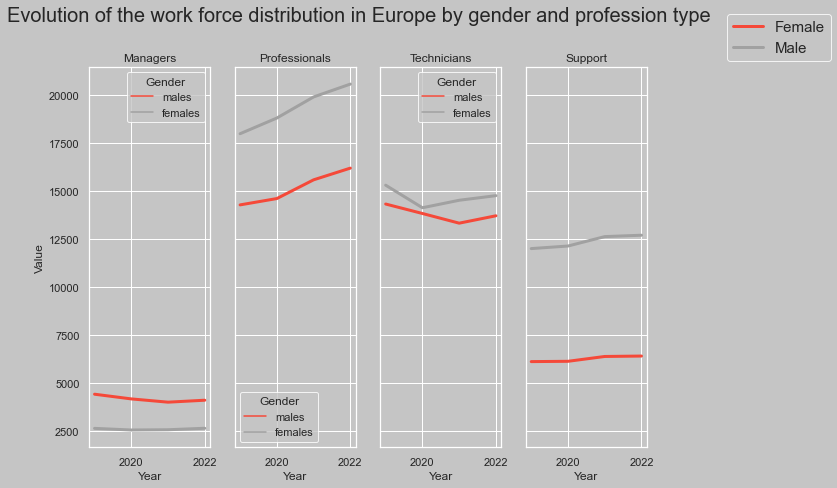

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(10, 7), facecolor=c("grey1"))
ax.set_facecolor(c("grey1"))
colors = [c('red'), c('grey2')]
sns.set_palette(sns.color_palette(colors))

line_plot_comparison_years(getLinePlotdata('managers'), 'Year', 'Value', 'Gender', ax1, 'Managers');
line_plot_comparison_years(getLinePlotdata('professionals'), 'Year', 'Value', 'Gender', ax2, 'Professionals');
line_plot_comparison_years(getLinePlotdata('technicians'), 'Year', 'Value', 'Gender', ax3, 'Technicians');
line_plot_comparison_years(getLinePlotdata('clerical_support'), 'Year', 'Value', 'Gender', ax4, 'Support');

plt.legend([],[], frameon=False)
plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.suptitle('Evolution of the work force distribution in Europe by gender and profession type', fontsize=20, y=1);